# Hospitality Insights - Analyzing Accommodation Preferences

## Table Of Contents

* [Business Problem Statement](#business-problem-statement)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Searches Dataset](#searches-dataset)
* [Distributions](#distribution)
* [Contacts Dataset](#contacts-dataset)



<a name="business-problem-statement"></a>
# Business Problem Statement:
    Explore user interactions and preferences on a short-term rental platform to improve the overall user experience and streamline the reservation process.

* Identify the date with the highest number of completed trips within a provided two-week period.

* Determine the peak number of completed trips within a 24-hour timeframe.

* Find the hour of the day with the maximum ride requests throughout the two-week duration.

* Calculate the percentage of instances with zero requests during weekends (Friday 5 pm to Sunday 3 am) within the two-week timeframe. Note: The local time value represents the start of the hour.

* Compute the weighted average ratio of completed trips per driver, considering the total trip volume in      each  hour over the two-week period.

* Establish the busiest 8 consecutive hours for unique ride requests over the two-week duration, considering a continuous 8-hour shift for drivers.

* Determine whether the statement "Driver supply always increases when demand increases during the two-week period" is true or false. Visualize the data if necessary.

* Identify the 72-hour period with the highest ratio of Zeroes to Eyeballs.

* Determine the optimal hour to add 5 drivers each day during the two-week period, considering both rider eyeballs and driver supply.

* Assess the accuracy of the statement: "There is exactly two weeks of data in this analysis."

* Identify the time that could be considered a true "end day" instead of midnight by examining when supply and demand are both at their natural minimums. Visualize the data for confirmation if needed.

![Image](https://img.rasset.ie/001e97e4-800.jpg)

<a name="data-description"></a>
# Data Description:

During the hour beginning at 4 pm (hour 16) on September 10th, 2012, 11 people engaged with a platform (Eyeballs). Among them, 2 did not find any available options (Zeroes), while 4 made requests (Requests). Out of these 4 requests, only 3 were successfully completed (Completed Trips). Throughout this period, a total of 6 individuals were actively participating (Unique Participants).




<a name="exploratory-data-analysis"></a>
# Exploratory Data Analysis:

Importing essential data analysis libraries, including Pandas for data manipulation, NumPy for numerical operations, Seaborn for data visualization, and Matplotlib for creating plots. Two datasets, namely "contacts.tsv" and "searches.tsv," are loaded into Pandas DataFrames – 'contacts_df' and 'searches_df,' respectively. The data is read from tab-separated values (tsv) files, emphasizing the use of the '\t' separator. These initial steps lay the foundation for the subsequent data exploration and analysis processes, enabling the user to leverage the functionalities of Pandas and other visualization tools for a comprehensive investigation of the datasets.


In [1]:
# Import libraries and load datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

contacts_data = ("contacts.tsv")
contacts_df = pd.read_csv(contacts_data, sep="\t")

searches_data = ("searches.tsv")
searches_df = pd.read_csv(searches_data, sep="\t")

Percentage of null values within the 'contacts_df' and 'searches_df' DataFrames is calculated and displayed. The 'isna()' function is employed to identify missing values, and the 'sum()' function aggregates the count of null values for each column. The result is then divided by the total number of entries in the respective datasets, providing a comprehensive overview of the proportion of missing values for each variable. This step is crucial for understanding the completeness of the datasets and helps guide decisions on handling missing data, such as imputation or exclusion, as part of the overall data preprocessing process.

In [2]:

# Find percentage of null values in datasets
print('Contacts')
print(contacts_df.isna().sum() / len(contacts_df), '\n')
print('Searches')
print(searches_df.isna().sum() / len(searches_df))

Contacts
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64 

Searches
ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64


<a name="searches-dataset"></a>
# Searches Dataset

Removing column 'filter_neighborhoods' from the 'searches_df' DataFrame using the 'drop' function. The 'drop' function, when applied to columns, allows for the exclusion of specific features from the dataset. By utilizing the 'columns' parameter and specifying the target column to be dropped, this operation facilitates the removal of the designated column from the DataFrame. This step is particularly useful when certain columns are deemed unnecessary for subsequent analyses or when feature selection is required to streamline the dataset for further exploration.

In [3]:
# Drop filter_neighborhoods column
searches_df = searches_df.drop(columns=['filter_neighborhoods'])

'searches_df' DataFrame undergoes manipulation to enhance its analytical potential. Three new columns are created, namely 'date_searched,' 'checkin_date,' and 'checkout_date,' by converting the corresponding columns ('ds,' 'ds_checkin,' and 'ds_checkout') to datetime format using the 'pd.to_datetime' function. This conversion facilitates subsequent time-based analyses.

Additionally, a new feature 'length_preparation' is introduced by calculating the duration between the 'checkin_date' and 'date_searched.' This metric represents the length of preparation time, providing insights into the duration users take to plan their accommodation stays. The inclusion of these derived features enhances the dataset, enabling a more detailed exploration of temporal aspects and patterns within the data.

In [4]:
# Manipulation of searches dataset
searches_df['date_searched'] = pd.to_datetime(searches_df['ds'])
searches_df['checkin_date'] = pd.to_datetime(searches_df['ds_checkin'])
searches_df['checkout_date'] = pd.to_datetime(searches_df['ds_checkout'])

# Calculate the length of preparation time
searches_df['length_preparation'] = searches_df['checkin_date'] - searches_df['date_searched']

Here is a descriptive summary of the 'searches_df' DataFrame is presented using the 'describe()' function, offering statistical insights into the numerical features within the dataset. This includes key statistical measures such as mean, standard deviation, minimum, maximum, and quartile information, providing an overview of the central tendency and distribution of the data.

Subsequently, the skewness of the dataset is calculated using the 'skew()' function. The skewness value for each numeric column is computed along the specified axis (axis=0) to assess the asymmetry in the distribution of each feature. A positive skewness indicates a right-skewed distribution, while a negative skewness suggests a left-skewed distribution. This analysis aids in understanding the shape and nature of the data distribution, contributing valuable information for subsequent analytical steps. The 'display()' function is utilized to present these statistical outputs in a clear and organized format.

In [5]:
# Describe searches dataset
display(searches_df.describe())

# Calculate skewness in searches dataset
display(searches_df.skew(axis=0, numeric_only=True, skipna=True))

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preparation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

<a name="distribution"></a>
# Distributions

Analysizng distribution plots for the 'n_guests_min' and 'n_guests_max' columns within the 'searches_df' DataFrame are generated using Seaborn's 'displot' function. The 'displot' function provides a convenient way to visualize the distribution of numerical data, allowing for a quick assessment of the spread and frequency of values.

Two separate plots are created, each representing the distribution of the specified variables. The 'x' parameter designates the variable to be plotted on the x-axis, and distinct colors ('brown' and 'black') are assigned to differentiate between the two distributions. These plots offer a visual understanding of the guest count distribution, providing insights into the frequency and range of values for both minimum and maximum guest counts.

c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


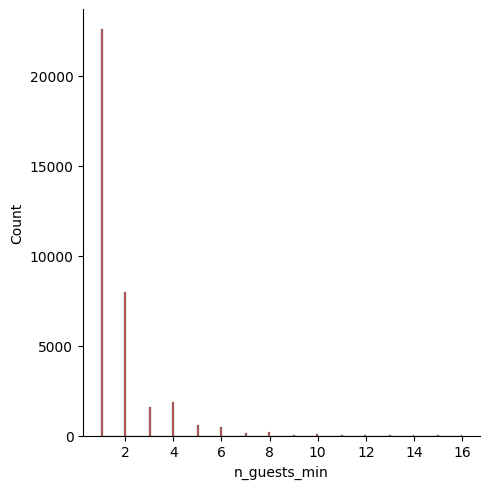

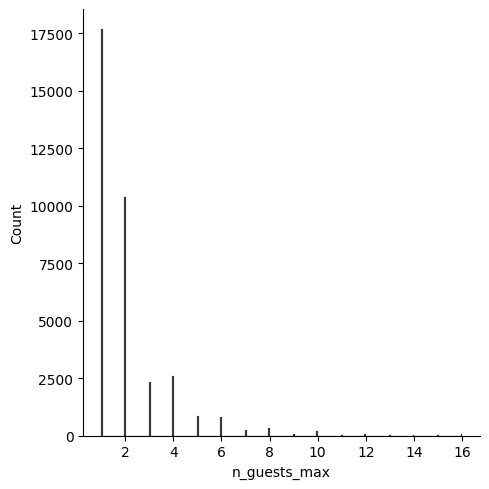

In [6]:
# Distribution plot of n_guests_min and n_guests_max
sns.displot(searches_df, x='n_guests_min', color='brown')
sns.displot(searches_df, x='n_guests_max', color='black')

Distribution plot of the searches conducted over time is created using Seaborn's 'displot' function. The 'x' parameter is set to 'date_searched,' representing the date when the searches were conducted. The resulting plot is visualized with a brown color.

To enhance readability, the x-axis labels are rotated by 90 degrees using the 'plt.setp' function. This adjustment is particularly useful when dealing with date values, as it prevents overcrowding of labels and ensures better visibility.

Overall, this visualization provides a chronological overview of when searches were initiated, facilitating the identification of any temporal patterns or trends in user behavior within the dataset.

c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

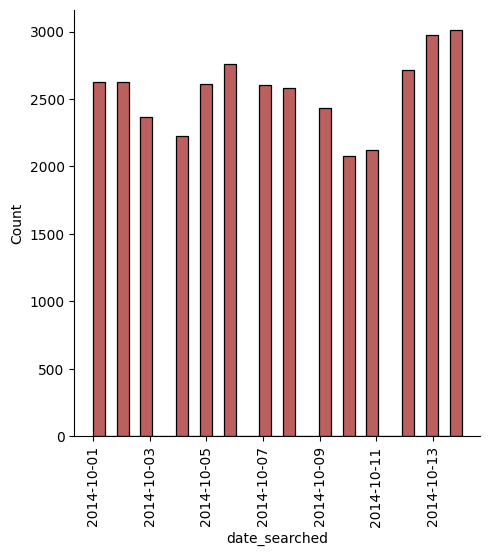

In [7]:
# When were searches conducted
ax = sns.displot(searches_df, x='date_searched', color='brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

he percentage of the dataset with 'filter_price_max' values exceeding 600 is calculated and printed. The expression inside the print statement uses boolean indexing to filter the rows where 'filter_price_max' is greater than 600, and the length of this filtered subset is divided by the total length of the 'filter_price_max' column. The result is then multiplied by 100 to obtain the percentage.

This analysis provides insights into the proportion of searches with higher price filters, specifically those above 600. It allows for an understanding of the prevalence of higher-priced accommodation preferences within the dataset.

In [8]:
# Percentage of dataset with filter_price_max above 600
print(len(searches_df[searches_df['filter_price_max'] > 600]) / len(searches_df['filter_price_max']) * 100, '%')


5.311022189887232 %


Distribution plot of the 'filter_price_max' values for searches is generated using Seaborn's 'displot' function. The 'x' parameter is set to the filtered subset 'searches_max_price_removed,' which includes only rows where 'filter_price_max' is less than or equal to 600. The resulting plot is visualized with a blue color.

This visualization aims to display the distribution of maximum price filters for searches, excluding values above 600. Such plots are valuable for gaining insights into the typical range of price preferences among users, as well as identifying any concentration or patterns in the distribution of maximum price limits within the specified range. The 'plt.show()' function is used to display the plot

c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


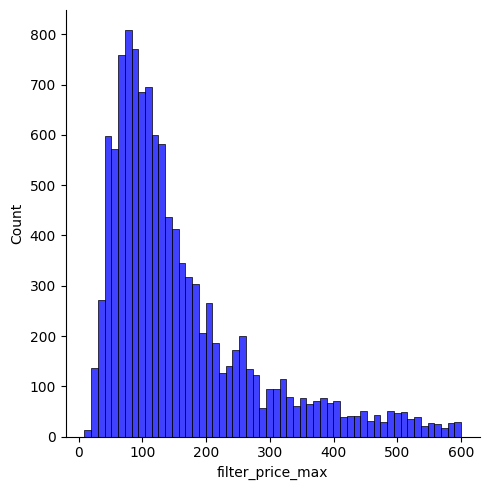

In [9]:
# Distribution of filter_price_max of searches
searches_max_price_removed = searches_df[searches_df['filter_price_max'] <= 600]
sns.displot(x=searches_max_price_removed["filter_price_max"], color='blue')
plt.show()


Exploring distribution of the 'length_preparation' variable for searches. First, a new 'distribution' series is created by converting the 'length_preparation' values from a timedelta format to days using the NumPy library. The percentage of entries in this distribution that exceed 100 days is then calculated and printed.

Following this, values exceeding 100 days are removed from the distribution, and a distribution plot is generated using Seaborn's 'displot' function. The 'x' parameter is set to the filtered 'distribution' series, and the plot is visualized with a green color.

This analysis focuses on understanding the distribution of preparation time for accommodation searches, particularly emphasizing values within a reasonable time frame (less than 100 days). The visualization provides insights into the concentration and spread of preparation times within the dataset.

9.396423874415872 % 



c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


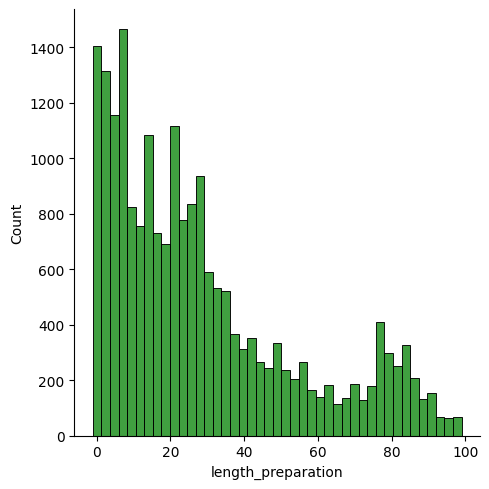

In [10]:


# Distribution of length_preparation of searches
distribution = searches_df["length_preparation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100]) / len(distribution) * 100, '% \n')
distribution = distribution[distribution < 100]
sns.displot(x=distribution, color='green')
plt.show()




Analysing the distribution of the 'n_nights' variable for searches. The percentage of entries in the dataset where the 'n_nights' value exceeds 20 is calculated and printed. Following this, a subset of the dataset, 'searches_within_twenty,' is created, including only those rows where 'n_nights' is less than 20.

A distribution plot is then generated using Seaborn's 'displot' function, focusing on the 'n_nights' variable within the filtered subset. The color of the plot is set to red.

This analysis aims to understand the distribution of the number of nights users are searching for, particularly emphasizing values within a reasonable range (less than 20 nights). The visualization provides insights into the concentration and spread of the duration of stays within the specified range

4.737387021854101 % 



c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


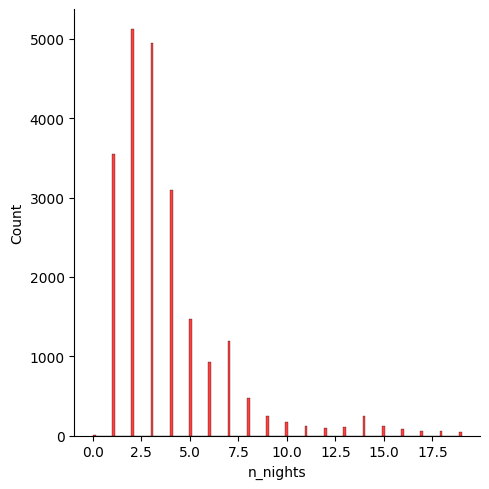

In [11]:
# Distribution of n_nights of searches
print(len(searches_df[searches_df['n_nights'] > 20]) / len(searches_df['n_nights']) * 100, '% \n')
searches_within_twenty = searches_df[searches_df['n_nights'] < 20]
sns.displot(searches_within_twenty, x='n_nights', color='red')

 the distribution of the months associated with the 'ds_checkin' variable in the searches dataset is visualized. The 'pd.DatetimeIndex' function is used to extract the month from the 'ds_checkin' column, and the resulting 'checkin_month' series is then utilized to create a distribution plot.

Seaborn's 'displot' function is employed to generate the plot, with the 'x' parameter set to 'checkin_month.' The color of the plot is specified as yellow.

This visualization aims to illustrate the distribution of check-in months for accommodation searches. Examining the distribution provides insights into the seasonal patterns of user search behavior, helping to identify any preferences or trends related to specific months. The 'plt.show()' function is used to display the plot.







c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


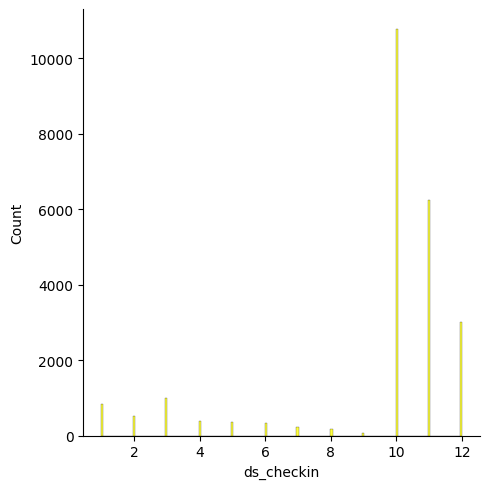

In [12]:

# Distribution of months of ds_checkin of searches
checkin_month = pd.DatetimeIndex(searches_df['ds_checkin']).month
sns.displot(checkin_month, color='yellow')
plt.show()

This analysis provides a glimpse into the various types of rooms users are searching for in the dataset. Understanding the diversity of room types can offer valuable insights into user preferences and accommodation choices within the studied dataset.

In [15]:
searches_df.columns

Index(['ds', 'id_user', 'ds_checkin', 'ds_checkout', 'n_searches', 'n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'filter_room_types', 'date_searched',
       'checkin_date', 'checkout_date', 'length_preparation'],
      dtype='object')

In [16]:
# Types of rooms searched for
searches_df['filter_room_types'].unique()[0:15]  # Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

The top 15 countries from which searches originate are identified. The 'search_origin' DataFrame is created by grouping the 'searches_df' dataset based on the 'origin_country' column and aggregating the counts for each country. The resulting DataFrame is then sorted in descending order based on the count values.

The 'nlargest' function is utilized to extract the 15 countries with the highest search counts, providing insight into the countries that contribute the most to the search activity within the dataset. This analysis aids in understanding the geographic distribution of user engagement in the context of accommodation searches.



In [17]:
# Find top 15 countries where searches originate from
search_origin = searches_df.groupby("origin_country").agg({'origin_country': 'count'})
search_origin.columns = ['count']
search_origin = search_origin.sort_values('count', ascending=False)
search_origin.nlargest(15, 'count')  # Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


<a name="contacts-dataset"></a>
# Contacts Dataset

The 'contacts_df' DataFrame undergoes manipulation to enhance its analytical capabilities. Date-related columns such as 'ts_contact_at,' 'ts_reply_at,' 'ts_accepted_at,' 'ts_booking_at,' 'ds_checkin,' and 'ds_checkout' are converted to datetime format using the 'pd.to_datetime' function. This conversion facilitates subsequent analyses involving temporal aspects.

Several new columns are introduced, including 'contact_at,' 'reply_at,' 'accepted_at,' 'booking_at,' 'checkin_date,' and 'checkout_date,' which represent the corresponding datetime values. Additionally, a binary 'accepted' column is created based on whether the 'accepted_at' values are null or not, denoting whether a contact resulted in acceptance.

Furthermore, a 'length_stay' column is introduced by calculating the duration between 'checkout_date' and 'checkin_date,' providing insights into the length of stay associated with each contact.

The 'display' function is employed to showcase the data types and descriptive statistics of the modified 'contacts_df' DataFrame, offering a comprehensive understanding of the dataset after these manipulations.

In [18]:
# Manipulation of contacts dataset
contacts_df['contact_at'] = pd.to_datetime(contacts_df['ts_contact_at'])
contacts_df['reply_at'] = pd.to_datetime(contacts_df['ts_reply_at'])
contacts_df['accepted_at'] = pd.to_datetime(contacts_df['ts_accepted_at'])
contacts_df['booking_at'] = pd.to_datetime(contacts_df['ts_booking_at'])
contacts_df['checkin_date'] = pd.to_datetime(contacts_df['ds_checkin'])
contacts_df['checkout_date'] = pd.to_datetime(contacts_df['ds_checkout'])
contacts_df['accepted'] = np.where(np.isnan(contacts_df['accepted_at']), False, True)
contacts_df['length_stay'] = contacts_df['checkout_date'] - contacts_df['checkin_date']

# Understand dataset
display(contacts_df.dtypes)
display(contacts_df.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at              object
ts_reply_at                object
ts_accepted_at             object
ts_booking_at              object
ds_checkin                 object
ds_checkout                object
n_guests                    int64
n_messages                  int64
contact_at         datetime64[ns]
reply_at           datetime64[ns]
accepted_at        datetime64[ns]
booking_at         datetime64[ns]
checkin_date       datetime64[ns]
checkout_date      datetime64[ns]
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


Calculating skewness of the numeric columns within the 'contacts_df' DataFrame using the 'skew()' function. The 'axis' parameter is set to 0 to compute the skewness along the columns, and 'numeric_only=True' ensures that only numeric columns are considered in the analysis. The 'skipna=True' parameter excludes missing values from the calculation.

In [19]:

# Calculate skewness in contacts dataset
display(contacts_df.skew(axis=0, numeric_only=True, skipna=True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

Generating a distribution plot using Seaborn's 'displot' function for contacts with less than 8 guests. The 'contacts_less_8' DataFrame is created by filtering 'contacts_df' to include only rows where the 'n_guests' variable is less than 8. The resulting plot visualizes the distribution of the number of guests ('n_guests') and distinguishes between contacts that were accepted and those that were not using the 'hue' parameter. The 'multiple="dodge"' option is used to display the distributions side by side, facilitating a comparative analysis.

This visualization provides a clear representation of the distribution of contacts with a focus on those involving fewer than 8 guests. Additionally, it allows for the examination of how the acceptance status varies with the number of guests. The 'plt.show()' function is employed to display the generated plot.


c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


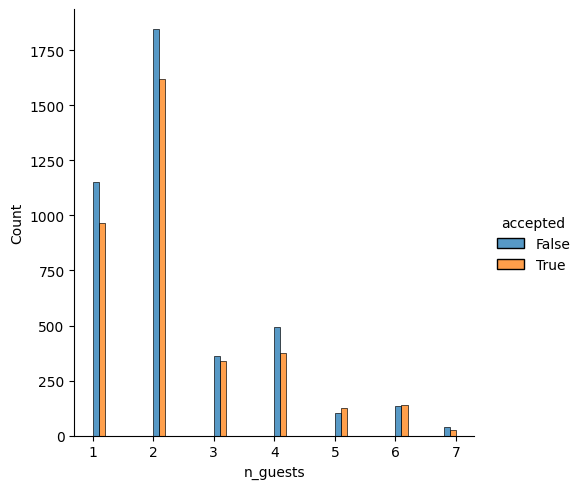

In [20]:

contacts_less_8 = contacts_df[contacts_df['n_guests'] < 8]
sns.displot(contacts_less_8, x='n_guests', hue='accepted', multiple="dodge")
plt.show()

the conversion rate from accepting to booking is calculated. The count of non-null values in the 'booking_at' column is divided by the count of non-null values in the 'accepted_at' column. This calculation yields the ratio of contacts that resulted in a booking to those that were accepted, providing a conversion rate.

This analysis helps understand the efficiency of the booking process following acceptance. The higher the conversion rate, the more effective the platform is at converting accepted contacts into actual bookings.

In [21]:
# Conversion rate from accepting to booking
contacts_df['booking_at'].count() / contacts_df['accepted_at'].count()

0.5993934381031155

Time-based analysis is performed to understand the timeframe of when guests are accepted versus rejected. The 'month_checkin' column is created by extracting the month component from the 'checkin_date' column using the 'dt.month' attribute. Subsequently, a subset of the 'contacts_df' DataFrame, named 'contacts_checkin,' is formed, including only those rows where the 'month_checkin' is greater than 9 (indicating October or later).

A distribution plot is then generated using Seaborn's 'displot' function, focusing on the 'month_checkin' variable and differentiating between contacts that were accepted and those that were not using the 'hue' parameter. The 'multiple="dodge"' option is used to display the distributions side by side for easy comparison. Additionally, the 'plt.xticks([10, 11, 12])' command ensures that only October, November, and December are displayed on the x-axis for improved readability.

This visualization provides insights into the acceptance and rejection patterns concerning guest check-in months, helping to identify any temporal trends or preferences within the dataset. The 'plt.show()' function is utilized to display the generated plot.

c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


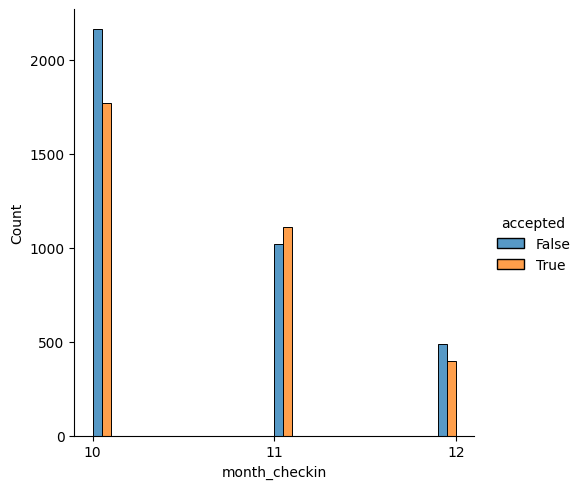

In [22]:

# Timeframe of when guests are accepted vs rejected
contacts_df['month_checkin'] = contacts_df['checkin_date'].dt.month
contacts_checkin = contacts_df[contacts_df['month_checkin'] > 9]
sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

 'contacts_df' and 'searches_df,' are merged based on the 'id_guest' column from 'contacts_df' and the 'id_user' column from 'searches_df.' The resulting merged dataset is named 'merged_datasets.' Subsequently, a subset named 'merged_pricemax_filter' is created by filtering rows where the 'filter_price_max' column is less than or equal to 600.

A distribution plot is then generated using Seaborn's 'displot' function for the 'filter_price_max' variable within the 'merged_pricemax_filter' subset. The plot distinguishes between accepted and non-accepted contacts using the 'hue' parameter, and the 'multiple="dodge"' option displays the distributions side by side for easy comparison.

This visualization aids in understanding the relationship between the maximum price filter ('filter_price_max') and the acceptance status of contacts within the merged dataset. The 'plt.show()' function is used to display the generated plot.







c:\Users\WalkingTree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


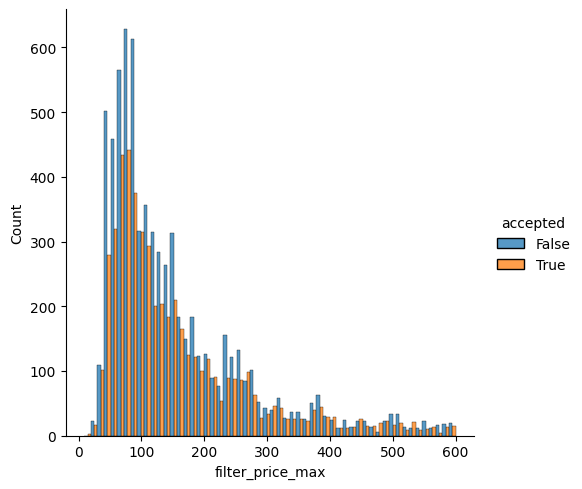

In [23]:
# Merge datasets for more analysis
merged_datasets = contacts_df.merge(searches_df, left_on='id_guest', right_on='id_user')

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()


A new column named 'classification_max_price' is added to the 'merged_datasets' DataFrame by applying the 'label_price' function to each row. The function categorizes each row based on the 'filter_price_max' values into different price ranges ('0-100,' '100-200,' ..., '600+'). This classification provides a more generalized view of the price range associated with each contact.

Subsequently, the dataset is grouped by the 'classification_max_price' column, and the mean of the 'accepted' column is calculated for each group. The resulting DataFrame, named 'classification_mean_acceptance,' contains the mean acceptance rate for each price range.

Finally, the results are printed to display the relationship between the categorized maximum price filter and the mean acceptance rates. This analysis can offer insights into how acceptance rates vary across different price ranges within the dataset.







In [24]:
# Classify dataset based on filter_price_max
def label_price(row):
    if 0 <= row['filter_price_max'] < 100:
        return '0-100'
    elif 100 <= row['filter_price_max'] < 200:
        return '100-200'
    elif 200 <= row['filter_price_max'] < 300:
        return '200-300'
    elif 300 <= row['filter_price_max'] < 400:
        return '300-400'
    elif 400 <= row['filter_price_max'] < 500:
        return '400-500'
    elif 500 <= row['filter_price_max'] < 600:
        return '500-600'
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

# Group by classification_max_price and calculate the mean of acceptance
classification_mean_acceptance = merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

# Display the results
print(classification_mean_acceptance)


                          accepted
classification_max_price          
0-100                     0.411160
100-200                   0.430308
200-300                   0.431149
300-400                   0.450488
400-500                   0.485549
500-600                   0.422297
600+                      0.433122
